'/home/gabitul/Desktop/AI/lab2/ImaginiHibrid'

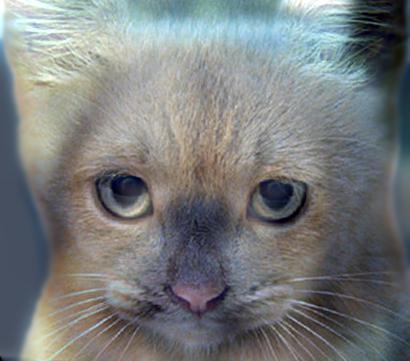

In [17]:
import matplotlib.pyplot as plt
import numpy as np
import scipy as sp
from scipy import ndimage
from scipy import misc
from IPython.display import Image

        
def lows (img, cutoff_freq) :
    img = img.astype(dtype=np.float32)
        
    bands = img.shape[2] if len(img.shape) >= 3 else 1
    im_width = img.shape[1]
    im_height = img.shape[0]
    slices = [slice(im_height), slice(im_width)]
    if bands != 1 :
        slices += [0]
    
    img_lows = np.empty(img.shape, dtype=np.float32)
    for band in range(bands) :
        if bands != 1 :
            slices[2] = band
        ndimage.gaussian_filter(img[slices], cutoff_freq, output=img_lows[slices], truncate=cutoff_freq*2)
            
    return img_lows

def highs (img, cutoff_freq) :
    img = img.astype(dtype=np.float32)
    
    img_lows = lows(img, cutoff_freq)
    
    return img - img_lows

# returns the hybrid image with items of type np.float32
# the image order is important, meaning that it will take the lows of the first 
# and the highs of the second
def hybrid (img1, img2, cutoff_freq) :
    img1 = img1.astype(dtype=np.float32)
    img2 = img2.astype(dtype=np.float32)
    
    im1lows = lows(img1, cutoff_freq)
    im2highs = highs(img2, cutoff_freq)
    
    hybrid = (im1lows + im2highs).clip(0.0, 255.0)
    
    return hybrid

# reading images and setting their data type
img1 = ndimage.imread('../data/dog.bmp').astype(np.float32)
img2 = ndimage.imread('../data/cat.bmp').astype(np.float32)

hybrid = hybrid(img1, img2, 7).astype(np.uint8)
misc.imsave('hybrid.jpg', hybrid)

Image('./hybrid.jpg')
